# Reat Estate Property Clustering 

## Problem Statement

Finding the right house is often a long, stressful, and tedious process. However, online system and e-real state makes it easier by giving customer details and unique insights on the homes they’re interested in. Real Estate systems have been expanded recently, generally each company built its own website to advertise its products and perform online buying and selling. Therefore, consumers can get lost in searching among those all websites and it became more conflict and time consuming. For that reason, building a common platform where people can compare various properties and their features and can get similar recommendation would be very helpful for consumers. 

Here, we will try to cluster the listed properties into natural clusters and see if this groups are similar or different. We will analyse these groups and brainstorm about how this info can be utlised to make a good recommendation to a user.




## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

    4.1 - Data Types and Summary Statistics

    4.2 - Missing Values

    4.3 - Univariate Analysis

    4.4 - Bivariate Analysis

    4.5 - Data Preparation

5. K-means Clustering

6. Cluster Profliling

## Optional

7. PCA 

## 1. Import necessary libraries

In [44]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## 2. Setting Options

In [45]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data and Display top 5 samples

In [46]:
df=pd.read_csv('property.csv')

In [47]:
# to display the top 5 rows of the dataframe
df.sample(5)

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
627,b43d58ce-27fe-4bc3-8f9b-ff1c285572d4,108000000.0000000,0,c2ab0a0e-c71b-4218-90db-16095a39983e,1.0000000,64,False,nan,1.0000000,True,16.0000000
1351,02e37c64-c7dc-41c4-8cb7-0b0f02067dbb,86400000.0000000,0,c17ec6fb-7428-4620-b0f3-e23f36513c85,1.0000000,47,True,nan,1.0000000,True,11.0000000
4220,d14d501d-39fb-4978-bf29-896be4d2017f,43200000.0000000,576000,30680871-7d7b-49a0-8946-ede2df725fcd,1.0000000,58,False,4.0000000,0.0000000,True,14.0000000
759,8e76bbfb-c05b-451c-b964-5197c9b03fc3,68400000.0000000,1368000,2d6e09d4-16b9-4a30-9bf2-0a0f6ecd00eb,2.0000000,79,True,nan,4.0000000,True,12.0000000
3795,25eeb6e8-2ff0-4b60-8d2b-28b0341bbe68,28800000.0000000,1152000,ee38804f-d4f3-489e-840a-9bcedbb534fb,0.0000000,42,False,3.0000000,0.0000000,False,4.0000000


## 4.  Data Analysis and Preparation

### 4.1  Check dimensions of the dataframe in terms of rows and columns

In [48]:
df.shape

(4930, 11)

### 4.2 Check data types and info of the dataframe. Mention your inferences out ouf this info

In [49]:
df.dtypes

item_id                  object
deposit                 float64
monthly_rent              int64
district_uuid            object
room_qty                float64
unit_area                 int64
has_elevator             object
building_floor_count    float64
unit_floor              float64
has_storage_area         object
property_age            float64
dtype: object

continues: deposit,monthly_rent,unit_area,,age
Discrete: room_qty,has_ele,building_floor,unit_floow,has_storage
object: item_id,district_uuid

### 4.3 Drop unnecessary columns

In [50]:
df['item_id'].nunique()

4930

In [51]:
df['building_floor_count'].isna().sum()/df.shape[0]

0.33427991886409736

### 4.4 Check summary statistics for both continuous and discrete variables and write your findings

In [52]:
df.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4925.0000000,4930.0000000,4927.0000000,4930.0000000,3282.0000000,4893.0000000,4926.0000000
mean,83212835.5736041,1052041.2170385,1.4718896,71.6533469,3.9707495,2.4171265,13.6510353
std,52899405.3371245,3797125.2210949,0.5794310,22.8908893,1.2806667,3.4962205,8.4839308
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-2.0000000,0.0000000
25%,43200000.0000000,0.0000000,1.0000000,55.0000000,3.0000000,1.0000000,8.0000000
50%,72000000.0000000,720000.0000000,1.0000000,67.0000000,4.0000000,2.0000000,14.0000000
75%,108000000.0000000,1440000.0000000,2.0000000,84.0000000,4.0000000,3.0000000,18.0000000
max,432000000.0000000,144000000.0000000,5.0000000,263.0000000,16.0000000,225.0000000,99.0000000


In [53]:
df.describe(include = 'O')

,item_id,district_uuid,has_elevator,has_storage_area
count,4930,4929,4913,4920
unique,4930,160,2,2
top,72c65be5-14c0-417e-bc75-4068c9b7b69b,b790f536-c274-4147-86e0-94d9b6d7352d,False,True
freq,1,428,3188,3212


In [54]:
dff = df.drop(['item_id'], axis=1)
dff.shape

(4930, 10)

### 4.5 Check for missing values

In [55]:
dff.isna().sum()

deposit                    5
monthly_rent               0
district_uuid              1
room_qty                   3
unit_area                  0
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64

In [56]:
dff['building_floor_count'].isna().sum()/dff.shape[0]

0.33427991886409736

## 5. Univariate Analysis

### 5.1.1 Plot distribution for 'deposit' using an appropriate plot

In [57]:
dff['deposit'].isna().sum()

5

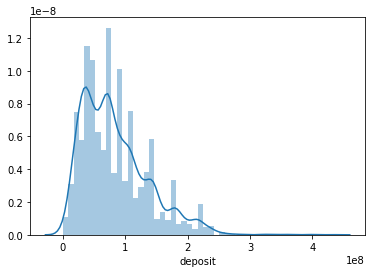

In [58]:
sns.distplot(dff['deposit'])

### 5.1.2 Print samples having deposit as 0 and drop them

In [59]:
dff[dff['deposit']==0]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
1779,0.0000000,144000000,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,2.0000000,89,False,nan,3.0000000,True,22.0000000
2447,0.0000000,0,991229e4-506e-48d6-942d-306001bb240c,2.0000000,63,False,nan,3.0000000,False,15.0000000
2864,0.0000000,1440000,9113051b-540b-42b0-94ee-2542e800d071,0.0000000,53,False,nan,1.0000000,False,11.0000000
3239,0.0000000,72000000,3ac48cb3-a697-4d94-a97c-3055f1ad4790,1.0000000,53,False,nan,nan,True,16.0000000
3271,0.0000000,0,289470b4-d669-4ef3-803b-b6250a4b966c,1.0000000,1,False,12.0000000,nan,False,1.0000000
3468,0.0000000,0,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,0.0000000,0,False,nan,0.0000000,False,0.0000000
3801,0.0000000,0,22604b8e-4463-48ee-bc27-c45c85758fa5,0.0000000,0,False,4.0000000,4.0000000,False,0.0000000
4720,0.0000000,144000000,1c10c124-59c8-4f0f-954d-1b1993c1c01b,2.0000000,75,False,nan,4.0000000,True,19.0000000


In [60]:
dff = dff[dff['deposit']!=0]
dff.shape

(4922, 10)

### 5.1.3 Check for samples having null deposit

In [99]:
df_nan = dff[dff['deposit'].isna()]
df_nan

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
469,nan,4320000,0463c357-b4ef-49ed-9327-fcba2397ef6d,1.0000000,74,False,3.0000000,0.0000000,True,18.0000000
483,nan,0,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,1.0000000,62,True,5.0000000,2.0000000,True,3.0000000
2838,nan,2520000,e15378f5-652b-4c49-9c25-6e9f8414d5e7,1.0000000,53,False,3.0000000,0.0000000,False,19.0000000
2914,nan,0,75e0f54e-3d91-4c74-8aba-e525ec3c1a96,nan,63,NaN,nan,3.0000000,NaN,nan
4155,nan,0,3407b7ba-a275-4ab7-bc13-28b08a54c028,2.0000000,119,True,6.0000000,6.0000000,True,0.0000000


In [62]:
dff_new = dff[~((dff.deposit.isnull()) & (dff.monthly_rent == 0))]
dff_new.shape

(4919, 10)

### 5.2.1 Check distribution for monthly_rent

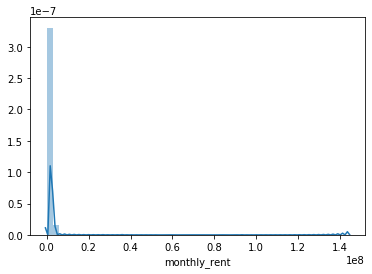

In [64]:
sns.distplot(df['monthly_rent'])

### 5.2.2 Check the count of samples having zero monthly rent. Discuss on how we should deal with these values

In [65]:
dff_new['monthly_rent'].nunique()

96

In [66]:
dff[dff['monthly_rent']==0].shape[0]/dff.shape[0]

0.374238114587566

In [67]:
dff_new[dff_new['monthly_rent']>10000000].shape[0]/dff_new.shape[0]

0.0012197601138442774

In [68]:
dff[dff["monthly_rent"]>10000000]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
344,21600000.0000000,19080000,4b497876-b376-4a2d-904b-0f7415244959,1.0000000,53,True,nan,1.0000000,False,14.0000000
1531,72000000.0000000,27360000,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,2.0000000,79,True,5.0000000,5.0000000,True,13.0000000
2420,1440000.0000000,93600000,4db2e17e-c169-4b39-9247-ee875d2792b9,1.0000000,67,True,nan,3.0000000,True,4.0000000
4334,216000.0000000,64800000,3ac48cb3-a697-4d94-a97c-3055f1ad4790,1.0000000,46,False,nan,1.0000000,False,15.0000000
4610,3240000.0000000,36000000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0000000,71,False,nan,1.0000000,True,24.0000000
4644,75600000.0000000,75600000,30680871-7d7b-49a0-8946-ede2df725fcd,1.0000000,50,True,4.0000000,1.0000000,True,2.0000000


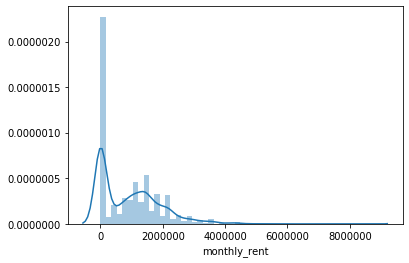

In [69]:
sns.distplot(dff[dff["monthly_rent"]<10000000]["monthly_rent"])

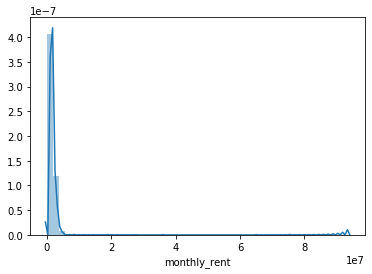

In [70]:
dff_new=dff[dff['monthly_rent']!=0]
sns.distplot(dff_new['monthly_rent'])

In [101]:
dff_new[ dff_new['monthly_rent']>10000000].shape[0]/dff_new.shape[0]

0.001948684637869438

### 5.3.1 Check distribution of unit_area

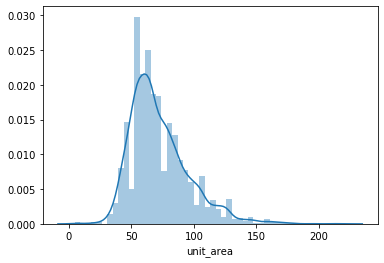

In [102]:
sns.distplot(dff_new['unit_area'])

### 5.3.1 Check samples having unit_area greater than 200 and less than 20. Discuss is they are valid or noise

In [103]:
dff_new[(dff_new['unit_area']>200)] 

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
562,36000000.0000000,4320000,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,3.0000000,210,False,2.0000000,2.0000000,True,15.0000000
2921,432000000.0000000,3600000,03331262-b194-4c33-93c8-36b2c34129c8,3.0000000,221,False,3.0000000,1.0000000,True,25.0000000


In [110]:
dff_new[dff_new['unit_area']<20]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
456,10800000.0000000,612000,411b7df0-bba0-4288-a1a8-7604606bb21a,0.0000000,16,False,4.0000000,4.0000000,False,5.0000000
479,36000000.0000000,1440000,fa5ca36c-38d1-435c-9e07-d2c224030ac2,1.0000000,5,False,nan,1.0000000,False,10.0000000
2397,3600000.0000000,612000,ee38804f-d4f3-489e-840a-9bcedbb534fb,1.0000000,6,False,nan,1.0000000,False,25.0000000
4872,57600000.0000000,1800000,340fb2dc-2d83-44b2-9140-0451bdae3b17,2.0000000,8,False,nan,4.0000000,True,14.0000000


### 5.4.1  Check distribution of property_age

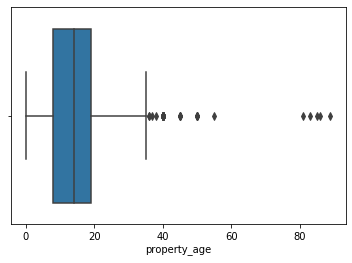

In [105]:
sns.boxplot(dff_new['property_age'])

### 5.4.2 Check samples having property_age greater than 50. Discuss is they are valid or noise

In [111]:
dff_new[dff_new['property_age']>50]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
794,21600000.0000000,1800000,0ffe3572-e03a-46d7-9ae3-3e50ed19e6c4,1.0000000,58,False,4.0000000,4.0000000,True,86.0000000
985,36000000.0000000,1224000,fa5ca36c-38d1-435c-9e07-d2c224030ac2,1.0000000,50,False,nan,4.0000000,False,81.0000000
1010,21600000.0000000,864000,30680871-7d7b-49a0-8946-ede2df725fcd,1.0000000,38,False,nan,2.0000000,False,85.0000000
2423,36000000.0000000,1512000,f9659f99-06e9-4f58-8402-3138acb47923,1.0000000,63,False,nan,1.0000000,True,83.0000000
2774,18000000.0000000,1224000,97780d3b-5100-46f7-a005-e06862d0e083,1.0000000,42,False,3.0000000,2.0000000,False,89.0000000
4166,7200000.0000000,684000,ca37c778-f641-43fe-85d3-42b7284fc673,1.0000000,43,False,2.0000000,1.0000000,False,55.0000000


### 5.5.1 Check distribution of unit_floor

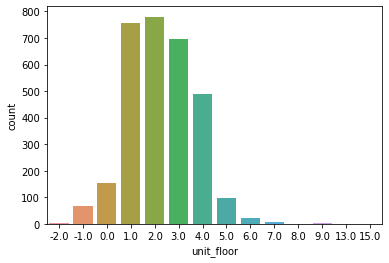

In [112]:
sns.countplot(dff_new['unit_floor'])

In [113]:
dff_new[dff_new['unit_floor']>10]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
799,72000000.0000000,2160000,411b7df0-bba0-4288-a1a8-7604606bb21a,1.0000000,67,True,16.0000000,15.0000000,True,5.0000000
3113,108000000.0000000,3240000,6cce06a4-9f72-42b6-abdc-52374d2c2428,3.0000000,137,True,13.0000000,13.0000000,True,9.0000000


In [143]:
dff_new=dff_new[dff_new['unit_floor']!=225]
dff_new.shape

(3079, 10)

## 5.5.2 Check for outlier value and impute it

In [142]:
dff_new[dff_new['unit_floor']>10]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
799,72000000.0000000,2160000,411b7df0-bba0-4288-a1a8-7604606bb21a,1.0000000,67,True,16.0000000,15.0000000,True,5.0000000
3113,108000000.0000000,3240000,6cce06a4-9f72-42b6-abdc-52374d2c2428,3.0000000,137,True,13.0000000,13.0000000,True,9.0000000


In [116]:
dff_new = dff_new[dff_new['unit_floor']!=225]
dff_new.shape

(3079, 10)

### 5.5.2 Check for null values for unit_floor and impute them

In [117]:
dff_new['unit_floor'].isna().sum()

0

In [118]:
dff_new['unit_floor'].fillna(dff_new['unit_floor'].mode()[0], inplace = True)

In [119]:
dff_new['unit_floor'].isna().sum()

0

### 5.6.1 Check frequency distribution of  room_qty and comment on it

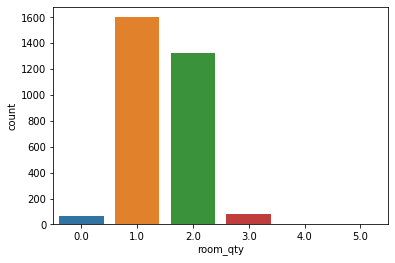

In [120]:
sns.countplot(dff_new['room_qty'])

In [162]:
dff_new[dff_new['room_qty']==0].shape

(62, 10)

In [122]:
dff_new[dff_new['room_qty']>3]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
1237,72000000.0000000,2520000,ffb45f2d-5652-4d04-909c-82ee9eec54eb,4.0000000,126,False,nan,3.0000000,False,30.0000000
1324,14400000.0000000,2592000,3ac48cb3-a697-4d94-a97c-3055f1ad4790,4.0000000,126,False,3.0000000,1.0000000,False,22.0000000
4329,72000000.0000000,4320000,402a922d-d082-4d13-8266-2bad33cb537c,5.0000000,144,True,7.0000000,1.0000000,False,40.0000000


### 5.7.1 Check frequency distribution of "has_storage_area" and "has_elevator"

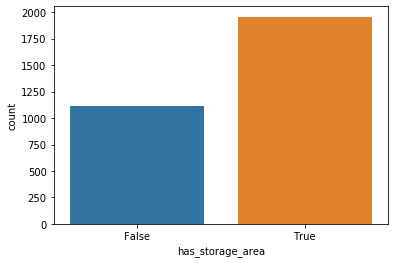

In [145]:
sns.countplot(dff_new['has_storage_area'])

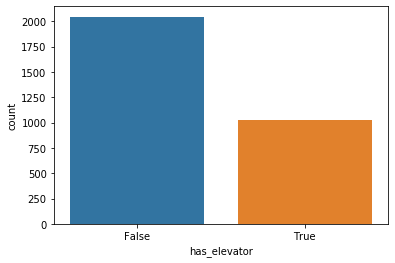

In [146]:
sns.countplot(dff_new['has_elevator'])

### 5.8.1 Check the frequency count for building_floor_count

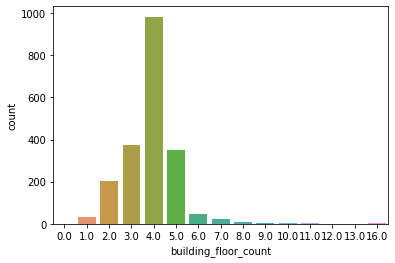

In [147]:
sns.countplot(dff_new['building_floor_count'])

In [148]:
dff_new[dff_new['building_floor_count']>10].shape

(7, 10)

### 5.8.1 Check null samples for building_floor_count. Discuss on approach to imput these null values

In [149]:
dff_new['building_floor_count'].isna().sum()/dff_new.shape[0]

0.3361481000324781

### 5.8.2 Replace null 'building_floor_count' with 'unit_floor' wherever 'unit_floor' is greater than 0 and replace it with mode if 'unit_floor' is 0

In [150]:
dff_new[['building_floor_count','unit_floor']]

,building_floor_count,unit_floor
1,nan,1.0000000
2,2.0000000,0.0000000
3,nan,2.0000000
4,nan,1.0000000
7,3.0000000,2.0000000
8,2.0000000,2.0000000
10,nan,1.0000000
11,5.0000000,3.0000000
13,4.0000000,3.0000000
16,nan,2.0000000


In [151]:
dff=dff_new.copy()

In [152]:
dff['building_floor_count'] = dff.apply(lambda i: i['unit_floor'] if np.isnan(i['building_floor_count']) and i['unit_floor']>0 
                                        else( 4 if np.isnan(i['building_floor_count']) and i['unit_floor']==0
                                                            else i['building_floor_count']), axis=1 )


In [153]:
dff['building_floor_count'].isna().sum()

0

### 5.11.1 Apply label encoder for district_uuid

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [155]:
dff['district_uuid'].nunique()

142

In [156]:
dff = dff.drop(['district_uuid'], axis=1)

### 5.9.1 Apply One Hot Encoding for 'has_elevator' and 'has_storage_area" 

In [157]:
df_final=pd.get_dummies(dff, drop_first=True)

### 5.10.1 Check for missing values in the dataframe and replace it with an appropriate value

In [158]:
df_final.isna().sum()

deposit                  2
monthly_rent             0
room_qty                 2
unit_area                0
building_floor_count     0
unit_floor               0
property_age             2
has_elevator_True        0
has_storage_area_True    0
dtype: int64

In [159]:
df_final.shape

(3079, 9)

In [160]:
df_final=df_final.fillna(df_final.mean())

In [161]:
df_final.isna().sum()

deposit                  0
monthly_rent             0
room_qty                 0
unit_area                0
building_floor_count     0
unit_floor               0
property_age             0
has_elevator_True        0
has_storage_area_True    0
dtype: int64

## 6. Bivariate Analysis

### 6.1 Check correlation and plot a heatmap and write your observations

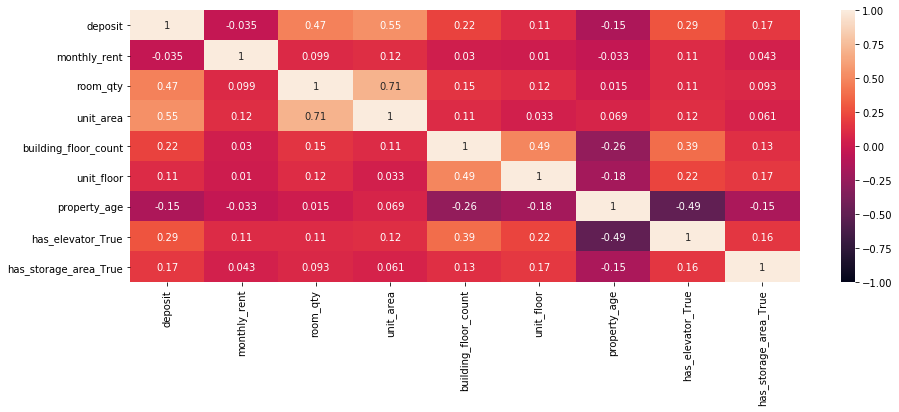

In [140]:
cor=df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor, vmax=1.0, vmin=-1.0,annot=True, annot_kws={"size":10})

### 6.2 Plot a pairplot and write your findings

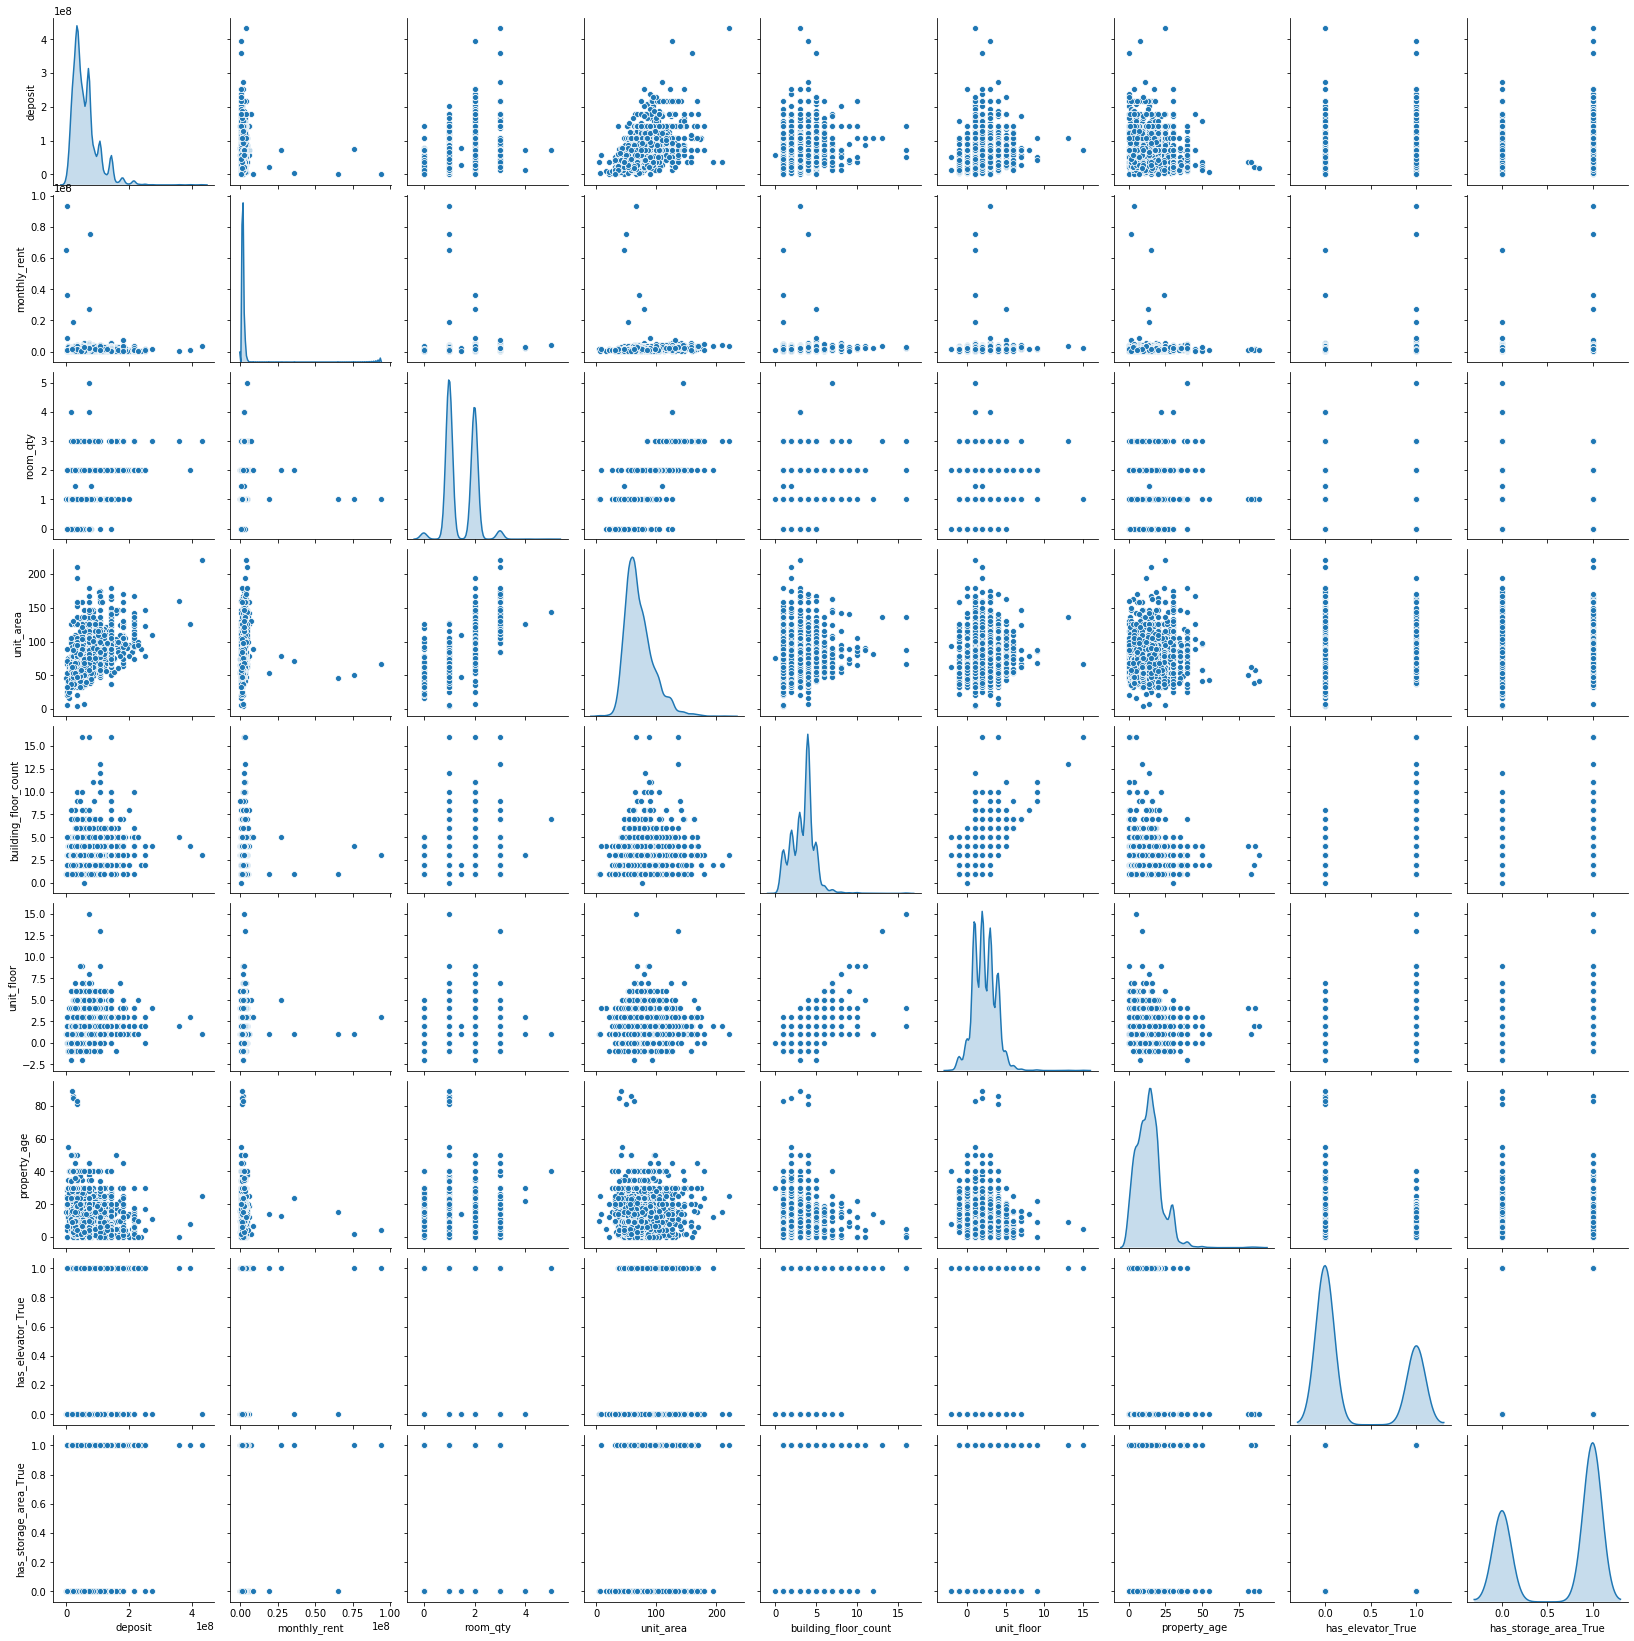

In [141]:
sns.pairplot(df_final,diag_kind='kde')

## 7. Data Preparation

### 7.1 Standardize the dataset

In [163]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled =  sc.fit_transform(df_final)
data = pd.DataFrame(df_scaled, columns=df_final.columns)
data.head()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True
0,0.2714863,1.0230401,0.8951177,1.8505535,-1.6673571,-0.8956414,0.2171830,1.4197433,0.7571833
1,-0.2601498,-0.0469634,-0.7915186,0.0732668,-0.9774240,-1.5934350,0.5607088,-0.7043527,0.7571833
2,-0.6145739,-0.2609641,-0.7915186,-0.5191621,-0.9774240,-0.1978479,-0.9279030,1.4197433,-1.3206842
3,-0.7917860,-0.1004636,-0.7915186,-1.1539073,-1.6673571,-0.8956414,-1.1569202,1.4197433,0.7571833
4,-0.8803920,0.0867870,-0.7915186,-0.1806313,-0.2874908,-0.1978479,0.4462002,-0.7043527,0.7571833


In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 


column_trans = ColumnTransformer([('scaler', StandardScaler(),['deposit', 'monthly_rent', 'room_qty', 'unit_area',
       'building_floor_count', 'unit_floor', 'property_age'])], remainder='passthrough') 

data = column_trans.fit_transform(df_final)

data = pd.DataFrame(data, columns= df_final.columns)
data.head()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True
0,0.2714863,1.0230401,0.8951177,1.8505535,-1.6673571,-0.8956414,0.2171830,1.0000000,1.0000000
1,-0.2601498,-0.0469634,-0.7915186,0.0732668,-0.9774240,-1.5934350,0.5607088,0.0000000,1.0000000
2,-0.6145739,-0.2609641,-0.7915186,-0.5191621,-0.9774240,-0.1978479,-0.9279030,1.0000000,0.0000000
3,-0.7917860,-0.1004636,-0.7915186,-1.1539073,-1.6673571,-0.8956414,-1.1569202,1.0000000,1.0000000
4,-0.8803920,0.0867870,-0.7915186,-0.1806313,-0.2874908,-0.1978479,0.4462002,0.0000000,1.0000000


## 8. K Means Clustering

### 8.1 Apply K-means on the scaled data. Try it with multiple K values ( K = 1 to 15) and plot a elbow plot between inertia and K value.

In [165]:
from sklearn.cluster import KMeans
error = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init = 10,random_state = 0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

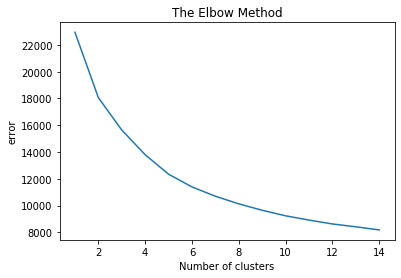

In [166]:
# plot the graph to visualize the optimal number of cluster through the elbow method
plt.plot(range(1,15),error)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

### 8.2 Check the silhouette_score for K = 2,3,4,and 5

In [167]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [3, 4, 5, 6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))


For n_clusters = 3, silhouette score is 0.16487578245244633)
For n_clusters = 4, silhouette score is 0.1700979309877412)
For n_clusters = 5, silhouette score is 0.17225629818029023)
For n_clusters = 6, silhouette score is 0.17372530750898202)


### 8.3 Report the optimal K value and fit the data clustering model using it. 

In [168]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans = kmeans.fit(data)
centroids = kmeans.cluster_centers_
print(centroids)
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans = kmeans.fit(data)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 6.46124978e-01  7.06032456e-02  7.10764392e-01  4.43830078e-01
   8.44480903e-01  7.31191135e-01 -5.43367108e-01  6.51162791e-01
   7.65116279e-01]
 [-5.17594180e-01 -1.37568967e-01 -7.97529118e-01 -6.60016641e-01
  -2.28366395e-01 -1.83910035e-01 -7.59345677e-04  2.33247423e-01
   5.79896907e-01]
 [-8.66805760e-01  2.83972961e+01 -7.91518616e-01 -7.58954737e-01
  -5.17468540e-01 -4.30445763e-01 -8.13394362e-01  6.66666667e-01
   6.66666667e-01]
 [ 3.76866121e-01  1.01801744e-01  9.47112003e-01  9.71278351e-01
  -5.57645371e-01 -5.15217868e-01  7.09208434e-01  1.46084337e-01
   5.97891566e-01]]
[[ 6.46124978e-01  7.06032456e-02  7.10764392e-01  4.43830078e-01
   8.44480903e-01  7.31191135e-01 -5.43367108e-01  6.51162791e-01
   7.65116279e-01]
 [-5.17594180e-01 -1.37568967e-01 -7.97529118e-01 -6.60016641e-01
  -2.28366395e-01 -1.83910035e-01 -7.59345677e-04  2.33247423e-01
   5.79896907e-01]
 [-8.66805760e-01  2.83972961e+01 -7.91518616e-01 -7.58954737e-01
  -5.17468540e-01 -4.304457

### 8.4 add cluster label to the final dataset (before scaling) for cluster profliling

In [169]:
df_final['cluster'] = kmeans.labels_
df_final.head(5)


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True,cluster
1,72000000.0000000,4320000,2.0000000,116,1.0000000,1.0000000,16.0000000,1,1,3
2,50400000.0000000,1440000,1.0000000,74,2.0000000,0.0000000,19.0000000,0,1,1
3,36000000.0000000,864000,1.0000000,60,2.0000000,2.0000000,6.0000000,1,0,1
4,28800000.0000000,1296000,1.0000000,45,1.0000000,1.0000000,4.0000000,1,1,1
7,25200000.0000000,1800000,1.0000000,68,3.0000000,2.0000000,18.0000000,0,1,1


## 9. Cluster Profiling

In [170]:
df_final['cluster'].value_counts()

1    1552
0     862
3     662
2       3
Name: cluster, dtype: int64

In [171]:
df_final[df_final['cluster']==3]

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True,cluster
1,72000000.0000000,4320000,2.0000000,116,1.0000000,1.0000000,16.0000000,1,1,3
19,36000000.0000000,2880000,2.0000000,152,1.0000000,1.0000000,30.0000000,0,0,3
21,57600000.0000000,1944000,2.0000000,74,2.0000000,2.0000000,14.0000000,0,1,3
25,21600000.0000000,1440000,2.0000000,89,2.0000000,1.0000000,15.0000000,0,1,3
30,108000000.0000000,1440000,2.0000000,77,4.0000000,0.0000000,14.0000000,1,0,3
35,50400000.0000000,1224000,2.0000000,95,3.0000000,2.0000000,30.0000000,0,0,3
38,144000000.0000000,720000,1.0000000,63,3.0000000,1.0000000,30.0000000,0,0,3
50,108000000.0000000,1296000,2.0000000,95,3.0000000,0.0000000,15.0000000,0,1,3
53,72000000.0000000,2160000,2.0000000,105,3.0000000,1.0000000,22.0000000,0,0,3
56,57600000.0000000,2880000,3.0000000,126,1.0000000,1.0000000,30.0000000,0,1,3


### 9.1 Check crosstab between cluster label and "has_elevator_True" and comment on the result

In [172]:
pd.crosstab(df_final['has_elevator_True'],df_final['cluster'])

cluster,0,1,2,3
has_elevator_True,,,,
0,301,1190,1,566
1,561,362,2,96


### 9.2 Check crosstab between cluster label and "room_qty" and comment on the result

In [173]:
pd.crosstab(df_final['room_qty'],df_final['cluster'])

cluster,0,1,2,3
room_qty,,,,
0.0000000,1,61,0,0
1.0000000,118,1435,3,44
1.4692883,0,1,0,1
2.0000000,717,55,0,556
3.0000000,26,0,0,58
4.0000000,0,0,0,2
5.0000000,0,0,0,1


### 9.3 Check crosstab between cluster label and "unit_floor" and comment on the result

In [174]:
pd.crosstab(df_final['unit_floor'],df_final['cluster'])

cluster,0,1,2,3
unit_floor,,,,
-2.0000000,0,1,0,1
-1.0000000,0,48,0,20
0.0000000,4,90,0,60
1.0000000,86,416,2,251
2.0000000,130,436,0,214
3.0000000,245,352,1,98
4.0000000,269,204,0,18
5.0000000,91,5,0,0
6.0000000,24,0,0,0


### 9.4 Plot Boxplot between cluster label and "deposit" and comment on the result

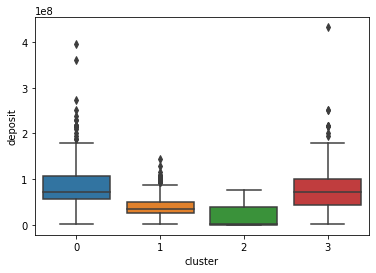

In [175]:
sns.boxplot(df_final['cluster'],df_final['deposit'])

### 9.5 Plot Boxplot between cluster label and "monthly_rent" and comment on the result

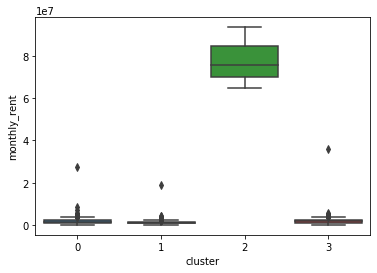

In [176]:
sns.boxplot(df_final['cluster'],df_final['monthly_rent'])

### 9.6 Plot Boxplot between cluster label and "unit_area" and comment on the result

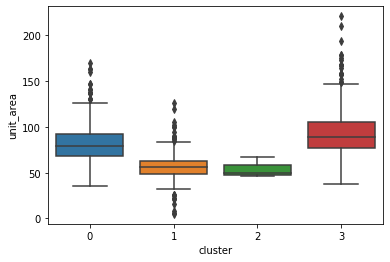

In [177]:
sns.boxplot(df_final['cluster'],df_final['unit_area'])

### 9.7 Plot Boxplot between cluster label and "property_age" and comment on the result

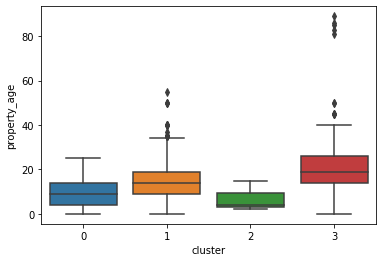

In [178]:
sns.boxplot(df_final['cluster'],df_final['property_age'])

## 10. Conclusion and Interpretation

In [ ]:
The data indicate that real estate sellers do not use all possible prices to list their properties.in this study, prices are classified as "just-below-even-ending".the data here provided is not good for model building.

# Optional Steps

##  PCA